# Sample Weights

This notebook will cover exercise answer.

* Exercise 4.1
* Exercise 4.2
* Exercise 4.3
* Exercise 4.4

As we go along, there will be some explanations.

More importantly, this method can be applied not just within mean-reversion strategy but also other strategies as well. Most of the functions below can be found under research/Sampling.

In [1]:
import numpy as np
import pandas as pd
import research as rs
import matplotlib.pyplot as plt

%matplotlib inline

Num of CPU core:  4
Machine info:  Windows-10-10.0.18362-SP0
Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy 1.17.3
Pandas 1.0.3


C:\Users\Wei_X\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1500x800 with 1 Axes>

In [2]:
dollar = pd.read_csv('./research/Sample_data/dollar_bars.txt', 
                 sep=',', 
                 header=0, 
                 parse_dates = True, 
                 index_col=['date_time'])

close = dollar['close']

In [3]:
day_vol = rs.vol(close, span0 = 50)

events = rs.cs_filter(close, 
                    limit = day_vol.mean())

vb = rs.vert_barrier(data = close, 
                 events = events, 
                 period = 'days', 
                 freq = 1)

tb = rs.tri_barrier(data = close, 
                    events = events, 
                    trgt = day_vol, 
                    min_req = 0.002, 
                    num_threads = 3, 
                    ptSl = [1,1],
                    t1 = vb, 
                    side = None)

C:\Users\Wei_X\Desktop\Python\research\Labels\triple_barrier_method.py:75: UserWarning: Data and events index shape must be same, reindex data to fit events
  warnings.warn('Data and events index shape must be same, reindex data to fit events')
C:\Users\Wei_X\Desktop\Python\research\Labels\triple_barrier_method.py:112: UserWarning: Not Recommended: No side prediction provided
  warnings.warn('Not Recommended: No side prediction provided')


[                                             t1                      sl  \
2015-09-16 19:59:40.048 2015-09-17 19:59:49.542                     NaT   
2015-09-16 20:00:13.782 2015-09-17 20:03:58.960                     NaT   
2015-09-16 20:13:49.208 2015-09-17 20:49:02.616 2015-09-17 19:55:09.135   
2015-09-17 02:31:29.158 2015-09-18 05:53:05.346 2015-09-17 20:03:58.960   
2015-09-17 07:50:29.399 2015-09-18 08:36:51.929                     NaT   
...                                         ...                     ...   
2016-04-28 01:20:23.379 2016-04-29 04:43:02.149 2016-04-28 03:08:23.517   
2016-04-28 03:08:23.517 2016-04-29 04:43:02.149 2016-04-28 08:11:31.935   
2016-04-28 03:49:42.423 2016-04-29 04:43:02.149 2016-04-28 08:11:31.935   
2016-04-28 06:14:15.071 2016-04-29 07:11:43.177 2016-04-28 08:11:31.935   
2016-04-28 07:22:07.437 2016-04-29 08:08:00.258 2016-04-28 08:58:32.457   

                                             pt  
2015-09-16 19:59:40.048 2015-09-17 18:13:04.358 

[                                             t1                      sl  \
2015-09-16 19:59:40.048 2015-09-17 19:59:49.542                     NaT   
2015-09-16 20:00:13.782 2015-09-17 20:03:58.960                     NaT   
2015-09-16 20:13:49.208 2015-09-17 20:49:02.616 2015-09-17 19:55:09.135   
2015-09-17 02:31:29.158 2015-09-18 05:53:05.346 2015-09-17 20:03:58.960   
2015-09-17 07:50:29.399 2015-09-18 08:36:51.929                     NaT   
...                                         ...                     ...   
2016-04-28 01:20:23.379 2016-04-29 04:43:02.149 2016-04-28 03:08:23.517   
2016-04-28 03:08:23.517 2016-04-29 04:43:02.149 2016-04-28 08:11:31.935   
2016-04-28 03:49:42.423 2016-04-29 04:43:02.149 2016-04-28 08:11:31.935   
2016-04-28 06:14:15.071 2016-04-29 07:11:43.177 2016-04-28 08:11:31.935   
2016-04-28 07:22:07.437 2016-04-29 08:08:00.258 2016-04-28 08:58:32.457   

                                             pt  
2015-09-16 19:59:40.048 2015-09-17 18:13:04.358 

2020-05-24 13:16:26.265370 100.0% _pt_sl_t1 done after 0.48 minutes. Remaining 0.0 minutes.


In [4]:
concurrent_event = rs.num_co_events(data = close, 
                                    events = tb, 
                                    num_threads = 3)

[date_time
2016-04-27 19:25:03.533    8.0
2016-04-27 19:41:30.784    6.0
2016-04-27 19:51:35.215    7.0
2016-04-27 19:58:31.433    8.0
2016-04-27 19:59:55.265    8.0
                          ... 
2016-12-30 20:55:33.160    2.0
2016-12-30 20:57:19.151    2.0
2016-12-30 20:58:34.724    2.0
2016-12-30 20:59:16.663    2.0
2016-12-30 20:59:34.157    1.0
Length: 8370, dtype: float64] this out
[date_time
2016-04-27 19:25:03.533    8.0
2016-04-27 19:41:30.784    6.0
2016-04-27 19:51:35.215    7.0
2016-04-27 19:58:31.433    8.0
2016-04-27 19:59:55.265    8.0
                          ... 
2016-12-30 20:55:33.160    2.0
2016-12-30 20:57:19.151    2.0
2016-12-30 20:58:34.724    2.0
2016-12-30 20:59:16.663    2.0
2016-12-30 20:59:34.157    1.0
Length: 8370, dtype: float64, date_time
2015-09-16 19:10:49.674    34.0
2015-09-16 19:22:06.172    32.0
2015-09-16 19:32:47.172    31.0
2015-09-16 19:45:01.362    24.0
2015-09-16 19:54:03.737    25.0
                           ... 
2016-04-27 19:59:55.265  

2020-05-24 13:16:40.902863 100.0% _num_co_events done after 0.23 minutes. Remaining 0.0 minutes.


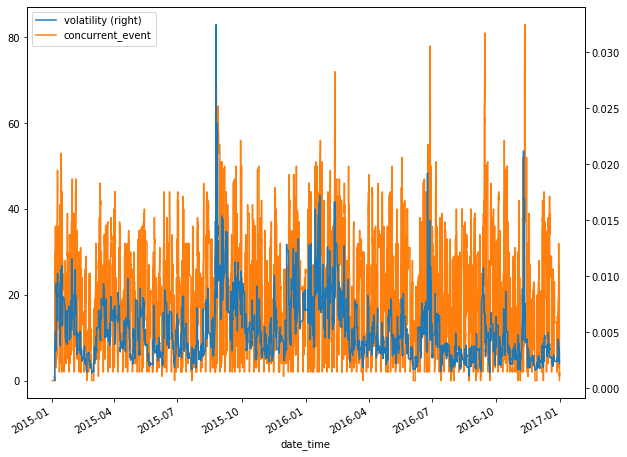

In [5]:
df0 = pd.DataFrame(index = concurrent_event.index).assign(volatility = day_vol, 
                                                          concurrent_event = concurrent_event )
df0[['volatility', 'concurrent_event']].plot(secondary_y='volatility', figsize=(10,8))
plt.show()

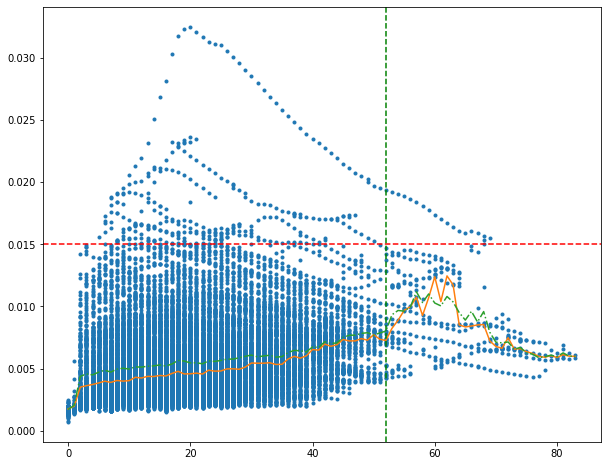

In [6]:
fig = plt.figure(figsize=(10,8))
df1 = df0.groupby(concurrent_event, axis = 0).median() # Try piecewise estimate median
df2 = df0.groupby(concurrent_event, axis = 0).mean() # Try piecewise estimate mean
plt.plot(df0['concurrent_event'], df0['volatility'], '.',
         df1['concurrent_event'], df1['volatility'], '-',
         df2['concurrent_event'], df2['volatility'], '-.')
plt.axhline(y = 0.015, c='r', ls='--')
plt.axvline(x = 52, c='g', ls='--')
plt.show()

### Based on the multiple line plot

Where there is an increase in number of concurrent events, there are evidence of high volatility. However, volatility might not lead to high concurrent events.

### Based on Scatter plot

Before the vertical green dotted line (where the num of concurrent events is before 52), there is an obvious gradual increase which obviously meant a positive relationship.

After the vertical green dotted line, the median num of concurrent events display high fluctuations, as a result the regression line might experienced a kinked plot, if we were to plot them seperately. 

This is most likely due to rare occurance of concurrent events that experience more than 52 times.

Below the red line, most frequent and average volatility is actually below 0.015 (Maximum volatility was around 0.03).

### Conclusion

* An increase in concurrent events may be caused by volatility (weak positive relationship for most cases).
* An increase in volatility might not cause an increase in concurrent events.
* High number of concurrent events that occurs beyond a certain point is rare. Does not require high volatility.

In [7]:
# Exercise 4.2
av_uniqueness_by_coevent = rs.wght_by_coevents(data = close, 
                        events = tb, 
                        num_threads = 3)

av_uniqueness_by_coevent

# not sure why but mine was never hitting 1 in the first column, 
# but seems to match the data freq from the book

[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-17 18:03:09.283    24.0
2015-09-17 18:05:03.370    25.0
2015-09-17 18:07:26.866    19.0
2015-09-17 18:10:32.478    20.0
2015-09-17 18:13:04.358    20.0
Length: 7953, dtype: float64] this out
[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-17 18:03:09.283    24.0
2015-09-17 18:05:03.370    25.0
2015-09-17 18:07:26.866    19.0
2015-09-17 18:10:32.478    20.0
2015-09-17 18:13:04.358    20.0
Length: 7953, dtype: float64, date_time
2016-04-27 19:25:03.533    8.0
2016-04-27 19:41:30.784    6.0
2016-04-27 19:51:35.215    7.0
2016-04-27 19:58:31.433    8.0
2016-04-27 19:59:55.265    8.0
                          ... 
2016-12-3

2020-05-24 13:16:56.391693 100.0% _num_co_events done after 0.23 minutes. Remaining 0.0 minutes.


[2015-01-05 14:54:26.286    0.314330
2015-01-05 14:57:13.616    0.228621
2015-01-05 15:01:57.494    0.162363
2015-01-05 15:07:29.012    0.165939
2015-01-05 15:13:09.655    0.143474
                             ...   
2015-09-16 17:36:52.308    0.036628
2015-09-16 18:07:42.523    0.036769
2015-09-16 18:23:00.858    0.034474
2015-09-16 18:42:07.121    0.034891
2015-09-16 18:58:18.016    0.039437
Length: 7403, dtype: float64] this out
[2015-01-05 14:54:26.286    0.314330
2015-01-05 14:57:13.616    0.228621
2015-01-05 15:01:57.494    0.162363
2015-01-05 15:07:29.012    0.165939
2015-01-05 15:13:09.655    0.143474
                             ...   
2015-09-16 17:36:52.308    0.036628
2015-09-16 18:07:42.523    0.036769
2015-09-16 18:23:00.858    0.034474
2015-09-16 18:42:07.121    0.034891
2015-09-16 18:58:18.016    0.039437
Length: 7403, dtype: float64, 2015-09-16 19:10:49.674    0.039723
2015-09-16 19:22:06.172    0.049734
2015-09-16 19:32:47.172    0.050196
2015-09-16 19:45:01.362    0.

2020-05-24 13:17:08.744503 100.0% _mp_sample_TW done after 0.19 minutes. Remaining 0.0 minutes.


,tW
2015-01-05 14:54:26.286,0.314330
2015-01-05 14:57:13.616,0.228621
2015-01-05 15:01:57.494,0.162363
2015-01-05 15:07:29.012,0.165939
2015-01-05 15:13:09.655,0.143474
...,...
2016-12-30 18:02:22.880,0.076801
2016-12-30 18:36:03.267,0.071452
2016-12-30 19:02:57.783,0.087996
2016-12-30 19:55:31.030,0.662500


Lagrange Multiplier tests for autocorrelation.

H0: the sequence was produced in a random manner.

H1: the sequence was not produced in a random manner.

If pval < 0.05 (Random: Accept H0).

In [8]:
from statsmodels.sandbox.stats import diagnostic

pval = diagnostic.acorr_lm(av_uniqueness_by_coevent.squeeze(), maxlag = 1, autolag = None)[1]
print("pvalue for LM test: {0}".format(pval))

pvalue for LM test: 0.0


### Conclusion

**Statistical significance is the likelihood that a relationship between two or more variables is caused by something other than chance**

It is statistically significant, since it is lesser than 0.05.

In the earlier exercise, when we try to explore a potential relationship between volatility and number of concurrent events, it was concluded that they display a weak positive correlation.

The volatility that we were using was actually daily percentage change in price (daily returns) and in financial theory context financial returns are seen as "random" (considered sub-martingale).

Therefore it is only natural that average uniqueness of concurrent events would also display similar randomness characteristics.

In [9]:
# Exercise 4.3
# We will start using ML models from sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [10]:
dollar = rs.bband_as_side(data = dollar, 
                          window = 50, 
                          width = 0.001)

dollar['volatility'] = rs.vol(dollar['close'], span0 = 50)

events = rs.cs_filter(dollar['close'], 
                    limit = dollar['volatility'].mean())

vb = rs.vert_barrier(data = dollar['close'], 
                 events = events, 
                 period = 'days', 
                 freq = 1)

tb = rs.tri_barrier(data = dollar['close'], 
                    events = events, 
                    trgt = dollar['volatility'], 
                    min_req = 0.002, 
                    num_threads = 3, 
                    ptSl = [0,2],
                    t1 = vb, 
                    side = dollar['side'])

mlabel = rs.meta_label(data = dollar['close'], 
                       events = tb, 
                       drop = False) # when you have a side binary, you won't have rare labels usually

Bollinger Band results:

Num of times upper limit touched: 10195
Num of times lower limit touched: 8987


C:\Users\Wei_X\Desktop\Python\research\Labels\triple_barrier_method.py:75: UserWarning: Data and events index shape must be same, reindex data to fit events
  warnings.warn('Data and events index shape must be same, reindex data to fit events')


[                                             t1  sl  pt
2016-04-13 18:29:02.408 2016-04-14 18:54:50.907 NaT NaT
2016-04-13 18:48:48.529 2016-04-14 18:54:50.907 NaT NaT
2016-04-13 19:07:58.695 2016-04-14 19:32:17.351 NaT NaT
2016-04-13 19:19:12.560 2016-04-14 19:32:17.351 NaT NaT
2016-04-13 19:31:57.511 2016-04-14 19:32:17.351 NaT NaT
...                                         ...  ..  ..
2016-12-30 20:59:58.848                     NaT NaT NaT
2016-12-30 21:00:00.352                     NaT NaT NaT
2016-12-30 21:00:24.294                     NaT NaT NaT
2016-12-30 21:03:03.027                     NaT NaT NaT
2016-12-30 21:13:31.990                     NaT NaT NaT

[6015 rows x 3 columns]] this out
[                                             t1  sl  pt
2016-04-13 18:29:02.408 2016-04-14 18:54:50.907 NaT NaT
2016-04-13 18:48:48.529 2016-04-14 18:54:50.907 NaT NaT
2016-04-13 19:07:58.695 2016-04-14 19:32:17.351 NaT NaT
2016-04-13 19:19:12.560 2016-04-14 19:32:17.351 NaT NaT
2016-04-13 

2020-05-24 13:17:36.410409 100.0% _pt_sl_t1 done after 0.4 minutes. Remaining 0.0 minutes.


In [11]:
dollar['st_series'] = rs.fracDiff_FFD(data = dollar['close'].to_frame(),
                                      d = 0.2,
                                      thres = 1e-2)

rs.unit_root(dollar['st_series'].dropna())

C:\Users\Wei_X\Desktop\Python\research\Features\fractional_diff.py:93: UserWarning: thres val <= 1.e-2 may not suit non-trend series, may take up longer than expected to calculate val i.e. 1e-5
  warnings.warn('thres val <= 1.e-2 may not suit non-trend series, may take up longer than expected to calculate val i.e. 1e-5')



Reject ADF Null hypothesis: Weak evidence that series is stationary
Reject KPSS Null hypothesis: Series contains unit root



C:\Users\Wei_X\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\Wei_X\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [12]:
# use crossing averages (primary model indicators), volatility and stationary series only

dollar = dollar.reindex(mlabel.index)

#only generate stationarity series when data is continueous

dollar['st_series_cs'] = rs.fracDiff_FFD(data = dollar['close'].cumsum().to_frame(),
                                      d = 1.99999889,
                                      thres = 1e-5)

rs.unit_root(dollar['st_series_cs'].dropna())

C:\Users\Wei_X\Desktop\Python\research\Features\fractional_diff.py:93: UserWarning: thres val <= 1.e-2 may not suit non-trend series, may take up longer than expected to calculate val i.e. 1e-5
  warnings.warn('thres val <= 1.e-2 may not suit non-trend series, may take up longer than expected to calculate val i.e. 1e-5')



Reject ADF Null hypothesis: Weak evidence that series is stationary
Reject KPSS Null hypothesis: Series contains unit root



In [13]:
log_price = dollar['close'].apply(np.log)

dollar['st_series_log'] = rs.fracDiff_FFD(data = log_price.to_frame(),
                                          d = 0.2,
                                          thres = 1e-2)

rs.unit_root(dollar['st_series_log'].dropna())


Reject ADF Null hypothesis: Weak evidence that series is stationary
Reject KPSS Null hypothesis: Series contains unit root



C:\Users\Wei_X\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [14]:
dollar['st_series_cs_log'] = rs.fracDiff_FFD(data = log_price.cumsum().to_frame(),
                                              d = 1.99999889,
                                              thres = 1e-5)

rs.unit_root(dollar['st_series_cs_log'].dropna())


Reject ADF Null hypothesis: Weak evidence that series is stationary
Reject KPSS Null hypothesis: Series contains unit root



Out-of-bag Accuracy (OOB Score): 0.678175


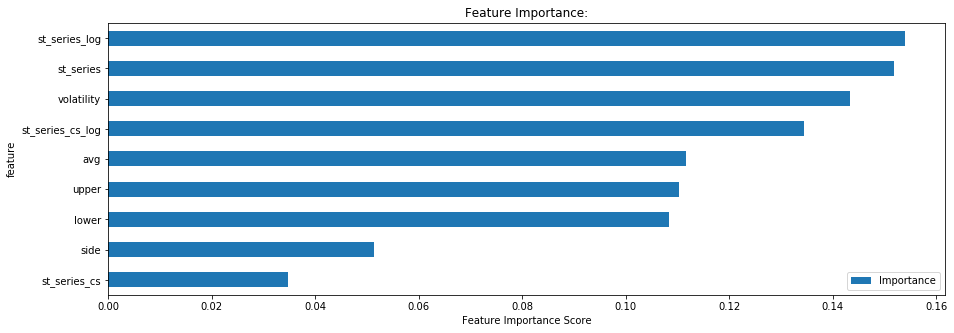

In [15]:
X = dollar.drop(['open', 'high', 'low', 'close','cum_vol', 'cum_dollar', 'cum_ticks'], axis = 1)
X.dropna(inplace = True) # we lost quite abit of data

mlabel = mlabel.reindex(X.index)
y = mlabel['bin']

n_estimators, max_depth, c_random_state = 500, 7, 42

# Random Forest Model
rf = RandomForestClassifier(max_depth = max_depth, 
                            n_estimators = n_estimators,
                            criterion = 'entropy',
                            #bootstrap=True,
                            #max_samples = av_uniqueness_by_coevent['tW'].mean()
                            oob_score = True,
                            class_weight = None, #This will be covered later
                            random_state = c_random_state)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

rf.fit(X_train, y_train.values.ravel())

print("Out-of-bag Accuracy (OOB Score): {:.6f}".format(rf.oob_score_))

rs.feat_imp(rf, X)

Our OOB score is: 0.678175

In sklearn version 0.22 they start to include max_samples, which was previously not covered.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

>"A second and better solution is to utilise the average uniqueness..
>
> Accordingly, we could sample only a fraction out['tW'].mean() of the observations or accept a small multiple of that"
>
>   Advances in Financial Machine Learning, page 63, last paragraph.

For more information regarding Out-of-Bag Score vs Random Forest Score:

https://datascience.stackexchange.com/questions/13151/randomforestclassifier-oob-scoring-method

Optional

You may wish to run func feat_imp from rs. I included 4 different stationary series.

At this point, you should be familiar with stationarity concept and what it means to a mean-reversion strategy.

If by some chance stationarity is not considered as a key feature by random forest model, you might wish to revisit the previous steps before meta-labeling.

In the above case, it seems that using non-log stationary series has the highest feature importance rank.

In [16]:
# Exercise 4.3b

# k-fold
no_of_folds = 5
kfold = KFold(shuffle = False, 
              random_state = 1, 
              n_splits = no_of_folds)

accuracy_array = np.zeros(no_of_folds)
i = 0
for train_index, test_index in kfold.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train.values.ravel())

    y_pred_rf = rf.predict_proba(X_test)[:, 1] #True positive only
    y_pred = rf.predict(X_test)
    accuracy_array[i] = accuracy_score(y_test, y_pred)
    i += 1
    
print("Mean KFold accuracy: {:.6f}".format(np.mean(accuracy_array)))

Mean KFold accuracy: 0.539802


Mean KFold score: 0.539802

For more details onsklearn KFold:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://machinelearningmastery.com/k-fold-cross-validation/

It is obvious why OOB score is much higher than KFold score. 

KFold only splits data to sample, but it does not replace or repick them. 

Random Forest OOB actually picks and replace samples (Bootstrap = True by default) and when uniqueness of dataset is not high due to concurrent events; this will make your OOB score very much the same as In-the-Bag sample and redundant to each other.

**KFold will reflect a less bias/ more correct outcome.**

For more details:

Refer to Advances in Financial Machine Learning, page 62 - 63, section 4.5.

In [17]:
# Exercise 4.4
# This func can be found under research/Sampling/sample_unique

wght_td = rs.wght_by_td(data = close, events = tb, num_threads = 3, td = 1.0)
wght_td0 = rs.wght_by_td(data = close, events = tb, num_threads = 3, td = 0.75)
wght_td1 = rs.wght_by_td(data = close, events = tb, num_threads = 3, td = 0.5)
wght_td2 = rs.wght_by_td(data = close, events = tb, num_threads = 3, td = 0.0)
wght_td3 = rs.wght_by_td(data = close, events = tb, num_threads = 3, td = -0.25)
wght_td4 = rs.wght_by_td(data = close, events = tb, num_threads = 3, td = -0.5)

# index is according to earlier func, which is part of the func wght_by_td
td_df = pd.DataFrame(index= av_uniqueness_by_coevent.index).assign(wght_td = wght_td,
                                                                   wght_td0 = wght_td0,
                                                                   wght_td1 = wght_td1,
                                                                   wght_td2 = wght_td2,
                                                                   wght_td3 = wght_td3,
                                                                   wght_td4 = wght_td4)


[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64] this out
[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64, date_time
2015-09-09 20:00:53.508    51.0
2015-09-09 20:09:36.729    50.0
2015-09-09 22:44:56.773    51.0
2015-09-10 02:39:46.140    51.0
2015-09-10 06:09:19.039    51.0
                           ... 
201

[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64, date_time
2015-09-09 20:00:53.508    51.0
2015-09-09 20:09:36.729    50.0
2015-09-09 22:44:56.773    51.0
2015-09-10 02:39:46.140    51.0
2015-09-10 06:09:19.039    51.0
                           ... 
2016-04-14 12:31:16.638    44.0
2016-04-14 13:00:04.426    44.0
2016-04-14 13:30:26.391    44.0
2016-04-14 13:35:43.127    44.0
2016-04-14 13:41:23.211    44.0
Length: 7501, dtype: float64, date_time
2016-04-13 13:40:33.995    39.0
2016-04-13 13:45:35.411    39.0
2016-04-13 13:52:05.094    39.0
2016-04-13 14:00:59.149    33.0
2016-04-13 14:12:07.040    34.0
                           ... 
2016-12-30 20

2020-05-24 13:19:55.829580 100.0% _num_co_events done after 0.21 minutes. Remaining 0.0 minutes.


[2016-04-13 13:40:33.995    0.024285
2016-04-13 13:45:35.411    0.024235
2016-04-13 13:52:05.094    0.024170
2016-04-13 14:00:59.149    0.024140
2016-04-13 14:12:07.040    0.024008
                             ...   
2016-12-29 19:34:00.251    0.065552
2016-12-29 19:50:32.702    0.072576
2016-12-29 20:43:20.886    0.106594
2016-12-29 20:56:54.013    0.142407
2016-12-29 21:00:00.349    0.279814
Length: 6003, dtype: float64] this out
[2016-04-13 13:40:33.995    0.024285
2016-04-13 13:45:35.411    0.024235
2016-04-13 13:52:05.094    0.024170
2016-04-13 14:00:59.149    0.024140
2016-04-13 14:12:07.040    0.024008
                             ...   
2016-12-29 19:34:00.251    0.065552
2016-12-29 19:50:32.702    0.072576
2016-12-29 20:43:20.886    0.106594
2016-12-29 20:56:54.013    0.142407
2016-12-29 21:00:00.349    0.279814
Length: 6003, dtype: float64, 2015-09-09 20:00:53.508    0.020380
2015-09-09 20:09:36.729    0.020395
2015-09-09 22:44:56.773    0.020403
2015-09-10 02:39:46.140    0.

2020-05-24 13:20:07.119468 100.0% _mp_sample_TW done after 0.18 minutes. Remaining 0.0 minutes.


[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64] this out
[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64, date_time
2016-04-13 13:40:33.995    39.0
2016-04-13 13:45:35.411    39.0
2016-04-13 13:52:05.094    39.0
2016-04-13 14:00:59.149    33.0
2016-04-13 14:12:07.040    34.0
                           ... 
201

2020-05-24 13:20:20.294209 100.0% _num_co_events done after 0.21 minutes. Remaining 0.0 minutes.


[2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.100382
2015-01-05 15:13:09.655    0.089994
                             ...   
2015-09-09 19:44:20.173    0.020000
2015-09-09 19:48:41.756    0.020345
2015-09-09 19:53:21.700    0.020344
2015-09-09 19:57:58.827    0.020351
2015-09-09 19:59:55.321    0.020365
Length: 6004, dtype: float64] this out
[2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.100382
2015-01-05 15:13:09.655    0.089994
                             ...   
2015-09-09 19:44:20.173    0.020000
2015-09-09 19:48:41.756    0.020345
2015-09-09 19:53:21.700    0.020344
2015-09-09 19:57:58.827    0.020351
2015-09-09 19:59:55.321    0.020365
Length: 6004, dtype: float64, 2015-09-09 20:00:53.508    0.020380
2015-09-09 20:09:36.729    0.020395
2015-09-09 22:44:56.773    0.020403
2015-09-10 02:39:46.140    0.

2020-05-24 13:20:31.374948 100.0% _mp_sample_TW done after 0.17 minutes. Remaining 0.0 minutes.


[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64] this out
[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64, date_time
2016-04-13 13:40:33.995    39.0
2016-04-13 13:45:35.411    39.0
2016-04-13 13:52:05.094    39.0
2016-04-13 14:00:59.149    33.0
2016-04-13 14:12:07.040    34.0
                           ... 
201

2020-05-24 13:20:44.492910 100.0% _num_co_events done after 0.21 minutes. Remaining 0.0 minutes.


[2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.100382
2015-01-05 15:13:09.655    0.089994
                             ...   
2015-09-09 19:44:20.173    0.020000
2015-09-09 19:48:41.756    0.020345
2015-09-09 19:53:21.700    0.020344
2015-09-09 19:57:58.827    0.020351
2015-09-09 19:59:55.321    0.020365
Length: 6004, dtype: float64] this out
[2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.100382
2015-01-05 15:13:09.655    0.089994
                             ...   
2015-09-09 19:44:20.173    0.020000
2015-09-09 19:48:41.756    0.020345
2015-09-09 19:53:21.700    0.020344
2015-09-09 19:57:58.827    0.020351
2015-09-09 19:59:55.321    0.020365
Length: 6004, dtype: float64, 2015-09-09 20:00:53.508    0.020380
2015-09-09 20:09:36.729    0.020395
2015-09-09 22:44:56.773    0.020403
2015-09-10 02:39:46.140    0.

2020-05-24 13:20:55.547579 100.0% _mp_sample_TW done after 0.17 minutes. Remaining 0.0 minutes.


[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64] this out
[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64, date_time
2016-04-13 13:40:33.995    39.0
2016-04-13 13:45:35.411    39.0
2016-04-13 13:52:05.094    39.0
2016-04-13 14:00:59.149    33.0
2016-04-13 14:12:07.040    34.0
                           ... 
201

2020-05-24 13:21:08.968183 100.0% _num_co_events done after 0.21 minutes. Remaining 0.0 minutes.


[2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.100382
2015-01-05 15:13:09.655    0.089994
                             ...   
2015-09-09 19:44:20.173    0.020000
2015-09-09 19:48:41.756    0.020345
2015-09-09 19:53:21.700    0.020344
2015-09-09 19:57:58.827    0.020351
2015-09-09 19:59:55.321    0.020365
Length: 6004, dtype: float64] this out
[2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.100382
2015-01-05 15:13:09.655    0.089994
                             ...   
2015-09-09 19:44:20.173    0.020000
2015-09-09 19:48:41.756    0.020345
2015-09-09 19:53:21.700    0.020344
2015-09-09 19:57:58.827    0.020351
2015-09-09 19:59:55.321    0.020365
Length: 6004, dtype: float64, 2015-09-09 20:00:53.508    0.020380
2015-09-09 20:09:36.729    0.020395
2015-09-09 22:44:56.773    0.020403
2015-09-10 02:39:46.140    0.

[2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.100382
2015-01-05 15:13:09.655    0.089994
                             ...   
2015-09-09 19:44:20.173    0.020000
2015-09-09 19:48:41.756    0.020345
2015-09-09 19:53:21.700    0.020344
2015-09-09 19:57:58.827    0.020351
2015-09-09 19:59:55.321    0.020365
Length: 6004, dtype: float64, 2015-09-09 20:00:53.508    0.020380
2015-09-09 20:09:36.729    0.020395
2015-09-09 22:44:56.773    0.020403
2015-09-10 02:39:46.140    0.020586
2015-09-10 06:09:19.039    0.020607
                             ...   
2016-04-13 11:57:15.165    0.024447
2016-04-13 12:42:13.114    0.024401
2016-04-13 13:25:20.521    0.024355
2016-04-13 13:32:09.778    0.024321
2016-04-13 13:35:58.923    0.024287
Length: 6004, dtype: float64, 2016-04-13 13:40:33.995    0.024285
2016-04-13 13:45:35.411    0.024235
2016-04-13 13:52:05.094    0.024170
2016-04-13 14:00:59.149    0.024140
201

2020-05-24 13:21:20.137461 100.0% _mp_sample_TW done after 0.18 minutes. Remaining 0.0 minutes.


[date_time
2016-04-13 13:40:33.995    39.0
2016-04-13 13:45:35.411    39.0
2016-04-13 13:52:05.094    39.0
2016-04-13 14:00:59.149    33.0
2016-04-13 14:12:07.040    34.0
                           ... 
2016-12-30 20:59:16.663     1.0
2016-12-30 20:59:34.157     1.0
2016-12-30 20:59:50.345     1.0
2016-12-30 20:59:58.848     1.0
2016-12-30 21:00:00.352     1.0
Length: 8819, dtype: float64] this out
[date_time
2016-04-13 13:40:33.995    39.0
2016-04-13 13:45:35.411    39.0
2016-04-13 13:52:05.094    39.0
2016-04-13 14:00:59.149    33.0
2016-04-13 14:12:07.040    34.0
                           ... 
2016-12-30 20:59:16.663     1.0
2016-12-30 20:59:34.157     1.0
2016-12-30 20:59:50.345     1.0
2016-12-30 20:59:58.848     1.0
2016-12-30 21:00:00.352     1.0
Length: 8819, dtype: float64, date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
201

2020-05-24 13:21:33.162681 100.0% _num_co_events done after 0.2 minutes. Remaining 0.0 minutes.


[2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.100382
2015-01-05 15:13:09.655    0.089994
                             ...   
2015-09-09 19:44:20.173    0.020000
2015-09-09 19:48:41.756    0.020345
2015-09-09 19:53:21.700    0.020344
2015-09-09 19:57:58.827    0.020351
2015-09-09 19:59:55.321    0.020365
Length: 6004, dtype: float64] this out
[2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.100382
2015-01-05 15:13:09.655    0.089994
                             ...   
2015-09-09 19:44:20.173    0.020000
2015-09-09 19:48:41.756    0.020345
2015-09-09 19:53:21.700    0.020344
2015-09-09 19:57:58.827    0.020351
2015-09-09 19:59:55.321    0.020365
Length: 6004, dtype: float64, 2016-04-13 13:40:33.995    0.024285
2016-04-13 13:45:35.411    0.024235
2016-04-13 13:52:05.094    0.024170
2016-04-13 14:00:59.149    0.

2020-05-24 13:21:44.426845 100.0% _mp_sample_TW done after 0.18 minutes. Remaining 0.0 minutes.


[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64] this out
[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64, date_time
2015-09-09 20:00:53.508    51.0
2015-09-09 20:09:36.729    50.0
2015-09-09 22:44:56.773    51.0
2015-09-10 02:39:46.140    51.0
2015-09-10 06:09:19.039    51.0
                           ... 
201

[date_time
2015-01-05 14:54:26.286     1.0
2015-01-05 14:57:13.616     2.0
2015-01-05 15:01:57.494     3.0
2015-01-05 15:07:29.012     4.0
2015-01-05 15:13:09.655     5.0
                           ... 
2015-09-10 19:47:56.574    41.0
2015-09-10 19:56:15.133    40.0
2015-09-10 19:59:57.063    40.0
2015-09-10 20:02:40.549    40.0
2015-09-11 00:03:59.027    41.0
Length: 7803, dtype: float64, date_time
2015-09-09 20:00:53.508    51.0
2015-09-09 20:09:36.729    50.0
2015-09-09 22:44:56.773    51.0
2015-09-10 02:39:46.140    51.0
2015-09-10 06:09:19.039    51.0
                           ... 
2016-04-14 12:31:16.638    44.0
2016-04-14 13:00:04.426    44.0
2016-04-14 13:30:26.391    44.0
2016-04-14 13:35:43.127    44.0
2016-04-14 13:41:23.211    44.0
Length: 7501, dtype: float64, date_time
2016-04-13 13:40:33.995    39.0
2016-04-13 13:45:35.411    39.0
2016-04-13 13:52:05.094    39.0
2016-04-13 14:00:59.149    33.0
2016-04-13 14:12:07.040    34.0
                           ... 
2016-12-30 20

2020-05-24 13:21:59.076951 100.0% _num_co_events done after 0.23 minutes. Remaining 0.0 minutes.


[2016-04-13 13:40:33.995    0.024285
2016-04-13 13:45:35.411    0.024235
2016-04-13 13:52:05.094    0.024170
2016-04-13 14:00:59.149    0.024140
2016-04-13 14:12:07.040    0.024008
                             ...   
2016-12-29 19:34:00.251    0.065552
2016-12-29 19:50:32.702    0.072576
2016-12-29 20:43:20.886    0.106594
2016-12-29 20:56:54.013    0.142407
2016-12-29 21:00:00.349    0.279814
Length: 6003, dtype: float64] this out
[2016-04-13 13:40:33.995    0.024285
2016-04-13 13:45:35.411    0.024235
2016-04-13 13:52:05.094    0.024170
2016-04-13 14:00:59.149    0.024140
2016-04-13 14:12:07.040    0.024008
                             ...   
2016-12-29 19:34:00.251    0.065552
2016-12-29 19:50:32.702    0.072576
2016-12-29 20:43:20.886    0.106594
2016-12-29 20:56:54.013    0.142407
2016-12-29 21:00:00.349    0.279814
Length: 6003, dtype: float64, 2015-01-05 14:54:26.286    0.232254
2015-01-05 14:57:13.616    0.165928
2015-01-05 15:01:57.494    0.109201
2015-01-05 15:07:29.012    0.

2020-05-24 13:22:11.777884 100.0% _mp_sample_TW done after 0.2 minutes. Remaining 0.0 minutes.


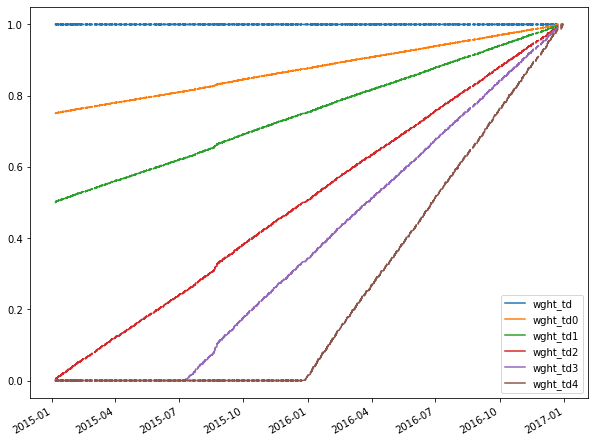

In [18]:
td_df[['wght_td',
       'wght_td0',
       'wght_td1',
       'wght_td2',
       'wght_td3',
       'wght_td4']].plot(figsize=(10,8)) #looks correct, seems identical to the book example

#Once you go negative for time-decay factor, data samples will start to be omitted